# FIT5196 Assessment 3
#### Student Name:Balaji Ippagunta
#### Student ID: 29876451

Date: 12/06/2019

Version: 3.0

Environment: Python 3.6.0 and Anaconda 4.3.0 (64-bit)

Libraries used:
* shapefile 
* warnings
* pandas
* shapely.geometry
* zipfile
* math
* sklearn
* numpy
* matplotlib

## 1. Introduction
We are given multiple datasets in various formats and the task is about creating housing information in Victoria, Australia by integrating data across the sources and calculating the required data.

Importing required libraries

In [1]:
import warnings
warnings.simplefilter('ignore')
import shapefile
import pandas as pd
from shapely.geometry import Point
from shapely.geometry.polygon import Polygon
from zipfile import ZipFile
import math
from sklearn.preprocessing import StandardScaler, MinMaxScaler
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error


Function to convert the shape file into a data frame

In [2]:
def read_shapefile(sf):
    """
    Read a shapefile into a Pandas dataframe with a 'coords' 
    column holding the geometry information. This uses the pyshp
    package
    """
    fields = [x[0] for x in sf.fields][1:]
    records = [list(rec) for rec in sf.records()]
    shps = [s.points for s in sf.shapes()]
    df = pd.DataFrame(columns=fields, data=records)
    df = df.assign(coords=shps)
    return df


In [3]:
data=pd.read_csv("29876451.csv")
sf = shapefile.Reader("vic_suburb_boundary\VIC_LOCALITY_POLYGON_shp") # note, no suffix, all 3 files are used
shapedf = read_shapefile(sf)
shapedf

,LC_PLY_PID,DT_CREATE,DT_RETIRE,LOC_PID,VIC_LOCALI,VIC_LOCA_1,VIC_LOCA_2,VIC_LOCA_3,VIC_LOCA_4,VIC_LOCA_5,VIC_LOCA_6,VIC_LOCA_7,coords
0,6670,2011-08-31,None,VIC2615,2012-04-27,None,UNDERBOOL,,,G,None,2,"[(141.74552399, -35.07228701), (141.74552471, ..."
1,6671,2011-08-31,None,VIC1986,2012-04-27,None,NURRAN,,,G,None,2,"[(148.668767, -37.39571245), (148.66876202, -3..."
2,6672,2011-08-31,None,VIC2862,2012-04-27,None,WOORNDOO,,,G,None,2,"[(142.92287999, -37.97885997), (142.90449196, ..."
3,6673,2011-08-31,None,VIC734,2017-08-09,None,DEPTFORD,,,G,None,2,"[(147.82335712, -37.66000897), (147.8231274, -..."
4,6674,2011-08-31,None,VIC2900,2012-04-27,None,YANAC,,,G,None,2,"[(141.279783, -35.99858911), (141.27988533, -3..."
5,6405,2011-08-31,None,VIC1688,2012-04-27,None,MINIMAY,,,G,None,2,"[(141.33074599, -36.641132), (141.33049656, -3..."
6,6451,2011-08-31,None,VIC999,2012-04-27,None,GLEN FORBES,,,G,None,2,"[(145.50393003, -38.42934404), (145.50827101, ..."
7,6452,2011-08-31,None,VIC7,2012-04-27,None,ADAMS ESTATE,,,G,None,2,"[(145.529139, -38.42198396), (145.530742, -38...."
8,6465,2011-08-31,None,VIC751,2012-04-27,None,DIMBOOLA,,,G,None,2,"[(142.1982832, -36.31185966), (142.1982885, -3..."
9,6466,2011-08-31,None,VIC467,2012-04-27,None,CANNUM,,,G,None,2,"[(142.34151903, -36.30394003), (142.30726416, ..."


### Suburbs

Evaluating the suburb for the given lat/long co-ordinates in our student data

In [4]:
listvar=[]
for i in range(0,len(data)):
    print(i)
    point = Point(round(data['Longtitude'][i],3),round(data['Lattitude'][i],3))
    for j in range(0,len(shapedf)):
        polygon = Polygon(shapedf['coords'][j])
        #print(tuple([float(data['Longtitude'][i]),float(data['Lattitude'][i])]), df['coords'][j])
        #print(j)
        if polygon.contains(point):
            print("there",data['ID'][i])
            suburb=shapedf['VIC_LOCA_2'][j]
            #print(tuple([round(data['Longtitude'][i],3),round(data['Lattitude'][i],3)]))
            break
        
    if suburb!="not Available":
        print(suburb)
    else:
        suburb="not Available"
    listvar.append(suburb)
            

0
there ID936583900
MOUNT WAVERLEY
1
there ID639338302
BRUNSWICK
2
there ID867071077
KEW
3
there ID837469648
TULLAMARINE
4
there ID867645514
BRIGHTON EAST
5
there ID220705510
MONT ALBERT
6
there ID205441607
ALBERT PARK
7
there ID255293260
BUNDOORA
8
there ID798309297
HEIDELBERG WEST
9
there ID141279127
DONCASTER
10
there ID481504862
KENSINGTON
11
there ID523765134
RINGWOOD EAST
12
there ID546158019
BRIGHTON EAST
13
there ID412353159
BRUNSWICK WEST
14
there ID437986939
BRUNSWICK
15
there ID874449180
CAIRNLEA
16
there ID434285922
GLEN IRIS
17
there ID246788039
CARLTON
18
there ID952572787
CARRUM
19
there ID376117659
KENSINGTON
20
there ID315973230
WHEELERS HILL
21
there ID867768342
GOWANBRAE
22
there ID936844579
HEIDELBERG WEST
23
there ID803738727
SOUTH YARRA
24
there ID126010582
ROSANNA
25
there ID255293260
BUNDOORA
26
there ID481962672
BROOKLYN
27
there ID688866347
SUNSHINE
28
there ID284839300
SUNSHINE WEST
29
there ID260419890
GLEN IRIS
30
there ID542084653
WILLIAMS LANDING
31
there

there ID878224083
BRUNSWICK WEST
253
there ID521910881
ASCOT VALE
254
there ID838837036
MOUNT WAVERLEY
255
there ID423055876
PRAHRAN
256
there ID747120896
TEMPLESTOWE LOWER
257
there ID895415693
HADFIELD
258
there ID317677052
OAKLEIGH SOUTH
259
there ID227680936
BENTLEIGH
260
there ID511512536
ORMOND
261
there ID301784782
WEST FOOTSCRAY
262
there ID303921273
SOUTH YARRA
263
there ID791918354
BENTLEIGH EAST
264
there ID806597798
ALBERT PARK
265
there ID876153280
COBURG
266
there ID810426918
KEW
267
there ID254059157
ORMOND
268
there ID795845607
HEIDELBERG HEIGHTS
269
there ID574127291
KINGSVILLE
270
there ID320015550
BENTLEIGH
271
there ID482225851
NORTH MELBOURNE
272
there ID214238175
BRIGHTON EAST
273
there ID816542929
ELWOOD
274
there ID541982961
MURRUMBEENA
275
there ID933614838
NEWPORT
276
there ID847913806
BRIGHTON
277
there ID340026012
LALOR
278
there ID945267009
PRESTON
279
there ID354779714
HAMPTON
280
there ID981457791
TULLAMARINE
281
there ID320395206
BENTLEIGH EAST
282
there

there ID316114982
MOORABBIN
503
there ID734017771
COBURG
504
there ID213021625
ELWOOD
505
there ID348836423
SOUTH MELBOURNE
506
there ID304698791
HEIDELBERG WEST
507
there ID221754870
KEILOR EAST
508
there ID570294898
HAWTHORN
509
there ID804249428
BOX HILL
510
there ID998529619
NIDDRIE
511
there ID985261293
SUNSHINE NORTH
512
there ID363543142
BALWYN NORTH
513
there ID318378451
COLLINGWOOD
514
there ID517108853
BLACKBURN
515
there ID386237028
DONCASTER
516
there ID785530184
GLEN IRIS
517
there ID349174653
KEILOR EAST
518
there ID548932054
KEW
519
there ID236206083
MOUNT WAVERLEY
520
there ID725107539
GLEN IRIS
521
there ID939458959
BRUNSWICK
522
there ID505142694
DONCASTER EAST
523
there ID820533944
ORMOND
524
there ID376639821
HOPPERS CROSSING
525
there ID251405795
OAK PARK
526
there ID582824783
SURREY HILLS
527
there ID560529368
KEW EAST
528
there ID124020865
YARRAVILLE
529
there ID350691659
ALBANVALE
530
there ID911951379
YARRAVILLE
531
there ID921501006
KEILOR DOWNS
532
there ID84

Creating a new data frame df to store the final results required

In [5]:
newDF = pd.DataFrame()
newDF['ID']=data['ID']
newDF['Address']=data['Address']
newDF['Suburb']=listvar
newDF['Price']=data['Price']
newDF['Type']=data['Type']
newDF['Date']=data['Date']
newDF['Rooms']=data['Rooms']
newDF['Bathroom']=data['Bathroom']
newDF['Car']=data['Car']
newDF['Landsize']=data['Landsize']
newDF['Age']=data['Age']
newDF['Latitude']=data['Lattitude']
newDF['Longitude']=data['Longtitude']
newDF['Year']=['a']*len(newDF)
for i in range(len(newDF)):
    newDF['Year'][i]=newDF['Date'][i][-4:]
newDF

,ID,Address,Suburb,Price,Type,Date,Rooms,Bathroom,Car,Landsize,Age,Latitude,Longitude,Year
0,ID936583900,1/21 Herbert St,MOUNT WAVERLEY,730000.0,u,12/08/2017,2,1.0,1.0,292.0,19.0,-37.86528,145.11775,2017
1,ID639338302,29 Stewart St,BRUNSWICK,2230000.0,h,4/03/2017,4,2.0,3.0,851.0,79.0,-37.76370,144.96620,2017
2,ID867071077,47 Kellett Gr,KEW,2245000.0,h,27/11/2016,4,3.0,2.0,627.0,60.0,-37.79150,145.03480,2016
3,ID837469648,1/119 Melrose Dr,TULLAMARINE,586000.0,h,8/07/2017,4,1.0,3.0,0.0,44.0,-37.70695,144.88514,2017
4,ID867645514,12 Pleasance St,BRIGHTON EAST,1573000.0,h,17/06/2017,3,1.0,2.0,670.0,89.0,-37.91855,145.02628,2017
5,ID220705510,40 Zetland Rd,MONT ALBERT,2350000.0,h,12/11/2016,6,3.0,3.0,2026.0,40.0,-37.81760,145.11170,2016
6,ID205441607,44 Draper St,ALBERT PARK,1810000.0,h,10/12/2016,2,1.0,0.0,240.0,119.0,-37.83790,144.95390,2016
7,ID255293260,74 Arthur St,BUNDOORA,796000.0,h,24/06/2017,3,2.0,2.0,534.0,69.0,-37.69852,145.04836,2017
8,ID798309297,498 Waterdale Rd,HEIDELBERG WEST,950000.0,h,19/11/2016,3,1.0,2.0,800.0,59.0,-37.74060,145.04830,2016
9,ID141279127,5/333 George St,DONCASTER,772000.0,u,10/12/2016,3,2.0,1.0,203.0,33.0,-37.77760,145.12670,2016


### Transportation

Extracting the regional and metro transport files and storing them into a data frames for processing the nearest station,traveeling time and train station id

In [6]:
with ZipFile("gtfs.zip", 'r') as zip: 
    zip.extractall()

In [7]:
with ZipFile("2/google_transit.zip", 'r') as zip:  
    zip.extractall()
metro_stop_times = pd.read_csv('stop_times.txt', sep=",")
metro_stops = pd.read_csv('stops.txt', sep=",")
metro_calendar = pd.read_csv('calendar.txt', sep=",")
metro_trips = pd.read_csv('trips.txt',sep=",")

In [8]:
with ZipFile("1/google_transit.zip", 'r') as zip: 
    zip.extractall()
regional_stop_times = pd.read_csv('stop_times.txt', sep=",")
regional_stops = pd.read_csv('stops.txt', sep=",")
regional_calendar = pd.read_csv('calendar.txt', sep=",")
regional_trips = pd.read_csv('trips.txt',sep=",")

Combing both the regional and metro stop_times and stops

In [9]:
# merging the stoptimes and stops of all 
stop_times = pd.concat([regional_stop_times,metro_stop_times])
stops = pd.concat([regional_stops,metro_stops])
trains = pd.merge(stop_times,stops, on='stop_id')

In [10]:

#trains[trains['trip_id']=="7548.UR.1-V08-A-mjp-1.1.H"]

Subsetting the data that has only southeen cross as a stop

In [11]:
train_id = []
def get_train_ids(row):
    if row['stop_name'] == "Southern Cross Railway Station (Melbourne City)":
        train_id.append(row['trip_id'])
trains.apply(get_train_ids,axis=1)

0         None
1         None
2         None
3         None
4         None
5         None
6         None
7         None
8         None
9         None
10        None
11        None
12        None
13        None
14        None
15        None
16        None
17        None
18        None
19        None
20        None
21        None
22        None
23        None
24        None
25        None
26        None
27        None
28        None
29        None
          ... 
541947    None
541948    None
541949    None
541950    None
541951    None
541952    None
541953    None
541954    None
541955    None
541956    None
541957    None
541958    None
541959    None
541960    None
541961    None
541962    None
541963    None
541964    None
541965    None
541966    None
541967    None
541968    None
541969    None
541970    None
541971    None
541972    None
541973    None
541974    None
541975    None
541976    None
Length: 541977, dtype: object

Deep copying the trains data frame into the new_trains data frame for data manipulations. This will preserve the data in the trains to be not modified

In [12]:
new_trains = trains.copy()
new_trains=new_trains[new_trains['trip_id'].isin(train_id)]
new_trains.index = range(len(new_trains))


Since we only need the transportation details of the weekdays we need to filter the data further for trips which run only on week days

In [13]:
regional_cal_service_ids = []
def regional_weekdays_func(row):
    if row['monday']==1 and row['tuesday']==1 and row['wednesday']==1 and row['thursday']==1 and row['friday']==1:
        regional_cal_service_ids.append(row['service_id'])
regional_calendar.apply(regional_weekdays_func,axis =1)

metro_cal_service_ids = []
def metro_weekdays_func(row):
    if row['monday']==1 and row['tuesday']==1 and row['wednesday']==1 and row['thursday']==1 and row['friday']==1:
        metro_cal_service_ids.append(row['service_id'])
metro_calendar.apply(metro_weekdays_func,axis =1)


0     None
1     None
2     None
3     None
4     None
5     None
6     None
7     None
8     None
9     None
10    None
11    None
12    None
13    None
14    None
15    None
16    None
17    None
18    None
19    None
20    None
21    None
22    None
23    None
24    None
25    None
26    None
27    None
28    None
29    None
30    None
dtype: object

Now we need to find out the trip ids for both the regional and metro trains that run on the week days

In [14]:
regional_trip_ids = []
def getting_trip_id_func(row):
    if row['service_id'] in regional_cal_service_ids:
        regional_trip_ids.append(row['trip_id'])
regional_trips.apply(getting_trip_id_func,axis=1)

def getting_trip_id_func2(row):
    if row['service_id'] in metro_cal_service_ids:
        regional_trip_ids.append(row['trip_id'])
metro_trips.apply(getting_trip_id_func2,axis=1)


0        None
1        None
2        None
3        None
4        None
5        None
6        None
7        None
8        None
9        None
10       None
11       None
12       None
13       None
14       None
15       None
16       None
17       None
18       None
19       None
20       None
21       None
22       None
23       None
24       None
25       None
26       None
27       None
28       None
29       None
         ... 
26457    None
26458    None
26459    None
26460    None
26461    None
26462    None
26463    None
26464    None
26465    None
26466    None
26467    None
26468    None
26469    None
26470    None
26471    None
26472    None
26473    None
26474    None
26475    None
26476    None
26477    None
26478    None
26479    None
26480    None
26481    None
26482    None
26483    None
26484    None
26485    None
26486    None
Length: 26487, dtype: object

In [15]:
trains_update = new_trains.copy()
trains_update=trains_update[trains_update['trip_id'].isin(regional_trip_ids)]
trains_update.index = range(len(trains_update))

Filtering based on time

In [16]:
trains_update['morning_trips'] = 0

def morning_trains_func(row):
    time = row['departure_time'].split(":")
    if row['stop_name']== "Southern Cross Railway Station (Melbourne City)":
        return 1
    elif (int(time[0])>=7) and (int(time[0])<9 ):
        return 1
    elif int(time[0])>7 and int(time[0])==9 and int(time[1])<30 :
        return 1
    else:
        return 0

trains_update['morning_trips'] = trains_update.apply(morning_trains_func,axis=1)

In [17]:
metro_trains_update = trains_update[trains_update['morning_trips']==1]
metro_trains_update.index = range(len(metro_trains_update))

Travel time to the southern cross station from each stop

Function to split the time into hours, minutes and seconds into total seconds

In [18]:
def get_sec(time_str):
    h, m, s = time_str.split(':')
    return int(h) * 3600 + int(m) * 60 + int(s)

In [19]:
metro_trains_update['time_to_ss'] = 0

SS_dataframe = metro_trains_update[metro_trains_update['stop_name']=="Southern Cross Railway Station (Melbourne City)"]
def CalculateTime(row):
    ss_time = list(metro_trains_update['departure_time'][(metro_trains_update['trip_id']==row['trip_id']) & (metro_trains_update['stop_name']== "Southern Cross Railway Station (Melbourne City)")])
    cs_time = row['departure_time']
    time_diff = (get_sec(ss_time[0])-get_sec(cs_time))/60
    return time_diff
metro_trains_update['time_to_ss'] = metro_trains_update.apply(CalculateTime,axis=1)
print("Calculating the time from each station")

Calculating the time from each station


In [20]:
# eliminating those trips that are -ve those trips are going away from southern cross
metro_trains_update_3 = metro_trains_update[metro_trains_update['time_to_ss']>=0]
metro_trains_update_3.index = range(len(metro_trains_update_3))

In [21]:
# getting the unique list of all the updated stops
trains_stations = metro_trains_update_3['stop_id'].unique()
updated_stops = stops[stops['stop_id'].isin(trains_stations)]
updated_stops.index = range(len(updated_stops))

In [22]:
# Functions to calculate shortest distance between two points
def distcalculator(lat1, lon1, lat2, lon2):
    R = 6378
    dlon = math.radians(lon2 - lon1)
    dlat = math.radians(lat2 - lat1)
    a = (math.sin(dlat / 2) * math.sin(dlat / 2) +
         math.cos(math.radians(lat1)) * math.cos(math.radians(lat2)) *
         math.sin(dlon / 2) * math.sin(dlon / 2))
    c = 2 * math.atan2(math.sqrt(a), math.sqrt(1 - a))
    distance = R * c
    return round(distance, 3)
def stationFinder(lat1, lon1):
    distance_dict = {}
    for each in range(0,len(updated_stops)):
        lat2 = updated_stops['stop_lat'][each]
        lon2 = updated_stops['stop_lon'][each]
        distance_dict[updated_stops['stop_id'][each]] = distcalculator(lat1, lon1, lat2, lon2)
    region_val = min(distance_dict.items(), key=lambda x: x[1])
    return pd.Series([region_val[0],distance_dict[region_val[0]]])

In [23]:
# assigning the values to train_station_id and the distance_to_train_station by calculating them from using the above 2 functions
newDF['train_station_id'] = 0
newDF['distance_to_train_station'] = 0
def getStationId(row):
    val = stationFinder(row['Latitude'],row['Longitude'])
    newDF.at[newDF['ID']==row['ID'],'train_station_id'] = val[0]
    newDF.at[newDF['ID']==row['ID'],'distance_to_train_station'] = val[1]
newDF.apply(getStationId,axis=1)
print("Assigning Values to train_station_id and distance_to_train_station")

Assigning Values to train_station_id and distance_to_train_station


In [24]:
# Using the below function to calculate the average time taken to reach CBD
newDF['travel_min_to_CBD'] = 0
def TimetoCBD(row):
    list1 = metro_trains_update_3['time_to_ss'][metro_trains_update_3['stop_id']==row['train_station_id']]
    return round(list1.mean(),2)
    
newDF['travel_min_to_CBD'] = newDF.apply(TimetoCBD,axis=1)

### Over Priced

In [25]:
def IsOverPriced(price,year,suburb,type,room,car,bathroom):
    med_price=newDF[(newDF['Year']==year) & (newDF['Suburb']==suburb) & (newDF['Type']==type) & (newDF['Rooms']==room) & (newDF['Car']==car) & (newDF['Bathroom']==bathroom)]['Price'].median()
    if price>med_price:
        return 1
    else:
        return 0
newDF['over_priced']=-1
newDF['over_priced']=newDF.apply(lambda x:IsOverPriced(x['Price'],x['Year'],x['Suburb'],x['Type'],x['Rooms'],x['Car'],x['Bathroom']),axis=1)

### Crime Data

In [26]:
crimedf2=pd.read_excel("crimebylocationdatatable-yearending31march2016.xlsx", sheetname='Table 1')
crimedf=crimedf2[17:]
del crimedf['Unnamed: 0']
crimedf=crimedf.reset_index()
del crimedf['index']
crimedf.columns=crimedf.iloc[0]
crimedf=crimedf[1:]
crimedf

,Apr - Mar reference period,Police Region,Police Service Area,Local Government Area,CSA Offence Division,CSA Offence Subdivision,Offence Count,LGA ERP,Victorian ERP
1,2012,1 North West Metro,BANYULE,BANYULE,A Crimes against the person,A10 Homicide and related offences,4,123600,5632521
2,2012,1 North West Metro,BANYULE,BANYULE,A Crimes against the person,A20 Assault and related offences,568,123600,5632521
3,2012,1 North West Metro,BANYULE,BANYULE,A Crimes against the person,A30 Sexual offences,132,123600,5632521
4,2012,1 North West Metro,BANYULE,BANYULE,A Crimes against the person,A40 Abduction and related offences,12,123600,5632521
5,2012,1 North West Metro,BANYULE,BANYULE,A Crimes against the person,A50 Robbery,46,123600,5632521
6,2012,1 North West Metro,BANYULE,BANYULE,A Crimes against the person,A60 Blackmail and extortion,2,123600,5632521
7,2012,1 North West Metro,BANYULE,BANYULE,A Crimes against the person,"A70 Stalking, harassment and threatening behav...",148,123600,5632521
8,2012,1 North West Metro,BANYULE,BANYULE,A Crimes against the person,A80 Dangerous and negligent acts endangering p...,75,123600,5632521
9,2012,1 North West Metro,BANYULE,BANYULE,B Property and deception offences,B10 Arson,53,123600,5632521
10,2012,1 North West Metro,BANYULE,BANYULE,B Property and deception offences,B20 Property damage,938,123600,5632521


In [27]:
council_data=open('councils.txt','r')
council_data_dic=dict()
for each in council_data:
    k=each.split(':')[0].strip()
    v=each.split(':')[1].strip().replace("'",'').replace('[','').replace(']','').upper().split(', ')
    council_data_dic[k]=v
def get_loc_gov(suburb):
    for k,v in council_data_dic.items():
        if suburb in v:
            loc_gov=k
            return loc_gov
    return 'WARRNAMBOOL'
newDF['Local Government']=newDF.apply(lambda x:get_loc_gov(x['Suburb']),axis=1)
newDF 

,ID,Address,Suburb,Price,Type,Date,Rooms,Bathroom,Car,Landsize,Age,Latitude,Longitude,Year,train_station_id,distance_to_train_station,travel_min_to_CBD,over_priced,Local Government
0,ID936583900,1/21 Herbert St,MOUNT WAVERLEY,730000.0,u,12/08/2017,2,1.0,1.0,292.0,19.0,-37.86528,145.11775,2017,19848.0,3.221,30.67,0,PORT PHILLIP
1,ID639338302,29 Stewart St,BRUNSWICK,2230000.0,h,4/03/2017,4,2.0,3.0,851.0,79.0,-37.76370,144.96620,2017,19967.0,0.557,27.33,0,MARIBYRNONG
2,ID867071077,47 Kellett Gr,KEW,2245000.0,h,27/11/2016,4,3.0,2.0,627.0,60.0,-37.79150,145.03480,2016,19931.0,1.492,24.00,0,SOUTH GIPPSLAND
3,ID837469648,1/119 Melrose Dr,TULLAMARINE,586000.0,h,8/07/2017,4,1.0,3.0,0.0,44.0,-37.70695,144.88514,2017,20032.0,2.838,36.00,0,CENTRAL GOLDFIELDS
4,ID867645514,12 Pleasance St,BRIGHTON EAST,1573000.0,h,17/06/2017,3,1.0,2.0,670.0,89.0,-37.91855,145.02628,2017,19939.0,0.949,35.15,0,HUME
5,ID220705510,40 Zetland Rd,MONT ALBERT,2350000.0,h,12/11/2016,6,3.0,3.0,2026.0,40.0,-37.81760,145.11170,2016,19896.0,0.579,28.77,0,BENALLA
6,ID205441607,44 Draper St,ALBERT PARK,1810000.0,h,10/12/2016,2,1.0,0.0,240.0,119.0,-37.83790,144.95390,2016,20043.0,2.181,0.00,1,BANYULE
7,ID255293260,74 Arthur St,BUNDOORA,796000.0,h,24/06/2017,3,2.0,2.0,534.0,69.0,-37.69852,145.04836,2017,20008.0,3.238,38.22,0,WODONGA
8,ID798309297,498 Waterdale Rd,HEIDELBERG WEST,950000.0,h,19/11/2016,3,1.0,2.0,800.0,59.0,-37.74060,145.04830,2016,19936.0,1.591,31.75,0,YARRA
9,ID141279127,5/333 George St,DONCASTER,772000.0,u,10/12/2016,3,2.0,1.0,203.0,33.0,-37.77760,145.12670,2016,20042.0,4.656,25.77,0,MORELAND


In [28]:
crimedfLevelA=crimedf[crimedf['CSA Offence Division']=='A Crimes against the person']
crimedfLevelB=crimedf[crimedf['CSA Offence Division']=='B Property and deception offences']
crimedfLevelC=crimedf[crimedf['CSA Offence Division']=='C Drug offences']

In [29]:
crimedfLevelA

,Apr - Mar reference period,Police Region,Police Service Area,Local Government Area,CSA Offence Division,CSA Offence Subdivision,Offence Count,LGA ERP,Victorian ERP
1,2012,1 North West Metro,BANYULE,BANYULE,A Crimes against the person,A10 Homicide and related offences,4,123600,5632521
2,2012,1 North West Metro,BANYULE,BANYULE,A Crimes against the person,A20 Assault and related offences,568,123600,5632521
3,2012,1 North West Metro,BANYULE,BANYULE,A Crimes against the person,A30 Sexual offences,132,123600,5632521
4,2012,1 North West Metro,BANYULE,BANYULE,A Crimes against the person,A40 Abduction and related offences,12,123600,5632521
5,2012,1 North West Metro,BANYULE,BANYULE,A Crimes against the person,A50 Robbery,46,123600,5632521
6,2012,1 North West Metro,BANYULE,BANYULE,A Crimes against the person,A60 Blackmail and extortion,2,123600,5632521
7,2012,1 North West Metro,BANYULE,BANYULE,A Crimes against the person,"A70 Stalking, harassment and threatening behav...",148,123600,5632521
8,2012,1 North West Metro,BANYULE,BANYULE,A Crimes against the person,A80 Dangerous and negligent acts endangering p...,75,123600,5632521
27,2012,1 North West Metro,BRIMBANK,BRIMBANK,A Crimes against the person,A10 Homicide and related offences,2,193334,5632521
28,2012,1 North West Metro,BRIMBANK,BRIMBANK,A Crimes against the person,A20 Assault and related offences,1163,193334,5632521


In [30]:
def get_crime_average(tempDF,year, loc_gov):
    average_crime_B_type_last_year=tempDF[(tempDF['Apr - Mar reference period']==int(float(year)-(1.0))) & (tempDF['Local Government Area']==loc_gov) ]['Offence Count'].mean()
    average_crime_B_type_second_last_year=tempDF[(tempDF['Apr - Mar reference period']==int(float(year)-(2.0))) & (tempDF['Local Government Area']==loc_gov)]['Offence Count'].mean()
    average_crime_B_type_third_last_year=tempDF[(tempDF['Apr - Mar reference period']==int(float(year)-(3.0))) & (tempDF['Local Government Area']==loc_gov)]['Offence Count'].mean()
    average_crime_B_type=(average_crime_B_type_last_year+average_crime_B_type_second_last_year+average_crime_B_type_third_last_year)/3
    return average_crime_B_type

In [31]:
newDF['crime_A_average']=newDF.apply(lambda x:get_crime_average(crimedfLevelA,x['Year'],x['Local Government']),axis=1)
newDF['crime_B_average']=newDF.apply(lambda x:get_crime_average(crimedfLevelB,x['Year'],x['Local Government']),axis=1)
newDF['crime_C_average']=newDF.apply(lambda x:get_crime_average(crimedfLevelC,x['Year'],x['Local Government']),axis=1)


In [32]:
del newDF['Local Government']
del newDF['Year']

In [33]:
newDF.drop_duplicates(subset ="ID",keep = 'first', inplace = True)

In [34]:
newDF

,ID,Address,Suburb,Price,Type,Date,Rooms,Bathroom,Car,Landsize,Age,Latitude,Longitude,train_station_id,distance_to_train_station,travel_min_to_CBD,over_priced,crime_A_average,crime_B_average,crime_C_average
0,ID936583900,1/21 Herbert St,MOUNT WAVERLEY,730000.0,u,12/08/2017,2,1.0,1.0,292.0,19.0,-37.86528,145.11775,19848.0,3.221,30.67,0,183.875000,1468.744444,194.916667
1,ID639338302,29 Stewart St,BRUNSWICK,2230000.0,h,4/03/2017,4,2.0,3.0,851.0,79.0,-37.76370,144.96620,19967.0,0.557,27.33,0,117.666667,1162.600000,191.888889
2,ID867071077,47 Kellett Gr,KEW,2245000.0,h,27/11/2016,4,3.0,2.0,627.0,60.0,-37.79150,145.03480,19931.0,1.492,24.00,0,37.357143,154.333333,24.666667
3,ID837469648,1/119 Melrose Dr,TULLAMARINE,586000.0,h,8/07/2017,4,1.0,3.0,0.0,44.0,-37.70695,144.88514,20032.0,2.838,36.00,0,40.785714,102.266667,18.222222
4,ID867645514,12 Pleasance St,BRIGHTON EAST,1573000.0,h,17/06/2017,3,1.0,2.0,670.0,89.0,-37.91855,145.02628,19939.0,0.949,35.15,0,362.166667,2128.500000,314.000000
5,ID220705510,40 Zetland Rd,MONT ALBERT,2350000.0,h,12/11/2016,6,3.0,3.0,2026.0,40.0,-37.81760,145.11170,19896.0,0.579,28.77,0,47.314286,86.455556,21.666667
6,ID205441607,44 Draper St,ALBERT PARK,1810000.0,h,10/12/2016,2,1.0,0.0,240.0,119.0,-37.83790,144.95390,20043.0,2.181,0.00,1,150.250000,1006.866667,111.000000
7,ID255293260,74 Arthur St,BUNDOORA,796000.0,h,24/06/2017,3,2.0,2.0,534.0,69.0,-37.69852,145.04836,20008.0,3.238,38.22,0,89.904762,319.888889,53.666667
8,ID798309297,498 Waterdale Rd,HEIDELBERG WEST,950000.0,h,19/11/2016,3,1.0,2.0,800.0,59.0,-37.74060,145.04830,19936.0,1.591,31.75,0,150.863095,1565.400000,285.277778
9,ID141279127,5/333 George St,DONCASTER,772000.0,u,10/12/2016,3,2.0,1.0,203.0,33.0,-37.77760,145.12670,20042.0,4.656,25.77,0,195.833333,1779.066667,148.166667


In [35]:
print("Total number of records",len(newDF['ID']))
print("Total number of unique records",len(newDF['ID'].unique()))

Total number of records 690
Total number of unique records 690


In [36]:
newDF

,ID,Address,Suburb,Price,Type,Date,Rooms,Bathroom,Car,Landsize,Age,Latitude,Longitude,train_station_id,distance_to_train_station,travel_min_to_CBD,over_priced,crime_A_average,crime_B_average,crime_C_average
0,ID936583900,1/21 Herbert St,MOUNT WAVERLEY,730000.0,u,12/08/2017,2,1.0,1.0,292.0,19.0,-37.86528,145.11775,19848.0,3.221,30.67,0,183.875000,1468.744444,194.916667
1,ID639338302,29 Stewart St,BRUNSWICK,2230000.0,h,4/03/2017,4,2.0,3.0,851.0,79.0,-37.76370,144.96620,19967.0,0.557,27.33,0,117.666667,1162.600000,191.888889
2,ID867071077,47 Kellett Gr,KEW,2245000.0,h,27/11/2016,4,3.0,2.0,627.0,60.0,-37.79150,145.03480,19931.0,1.492,24.00,0,37.357143,154.333333,24.666667
3,ID837469648,1/119 Melrose Dr,TULLAMARINE,586000.0,h,8/07/2017,4,1.0,3.0,0.0,44.0,-37.70695,144.88514,20032.0,2.838,36.00,0,40.785714,102.266667,18.222222
4,ID867645514,12 Pleasance St,BRIGHTON EAST,1573000.0,h,17/06/2017,3,1.0,2.0,670.0,89.0,-37.91855,145.02628,19939.0,0.949,35.15,0,362.166667,2128.500000,314.000000
5,ID220705510,40 Zetland Rd,MONT ALBERT,2350000.0,h,12/11/2016,6,3.0,3.0,2026.0,40.0,-37.81760,145.11170,19896.0,0.579,28.77,0,47.314286,86.455556,21.666667
6,ID205441607,44 Draper St,ALBERT PARK,1810000.0,h,10/12/2016,2,1.0,0.0,240.0,119.0,-37.83790,144.95390,20043.0,2.181,0.00,1,150.250000,1006.866667,111.000000
7,ID255293260,74 Arthur St,BUNDOORA,796000.0,h,24/06/2017,3,2.0,2.0,534.0,69.0,-37.69852,145.04836,20008.0,3.238,38.22,0,89.904762,319.888889,53.666667
8,ID798309297,498 Waterdale Rd,HEIDELBERG WEST,950000.0,h,19/11/2016,3,1.0,2.0,800.0,59.0,-37.74060,145.04830,19936.0,1.591,31.75,0,150.863095,1565.400000,285.277778
9,ID141279127,5/333 George St,DONCASTER,772000.0,u,10/12/2016,3,2.0,1.0,203.0,33.0,-37.77760,145.12670,20042.0,4.656,25.77,0,195.833333,1779.066667,148.166667


In [38]:
newDF.to_csv('29876451_solution.csv')

## Task2: Data Reshaping
### Data normalization and Transformation

In [39]:
scaler = StandardScaler()
features = newDF[['crime_C_average', 'travel_min_to_CBD', 'Age', 'Rooms','Price']].astype('float')
features = features.dropna()
x = scaler.fit(features).transform(features)
x

array([[ 0.43706246,  0.37824898, -0.99856203, -1.01387046, -0.5850013 ],
       [ 0.41186328,  0.07504987,  0.71148835,  1.06509125,  1.79283246],
       [-0.97987099, -0.22724146,  0.1699724 ,  1.06509125,  1.8166108 ],
       ...,
       [ 0.34065827, -0.0111894 ,  0.14147156,  1.06509125, -0.66426242],
       [-0.60350166, -1.32565741,  2.13653034,  0.0256104 ,  0.16005328],
       [ 0.00636463, -0.51773163, -1.39757379,  0.0256104 ,  1.4361574 ]])

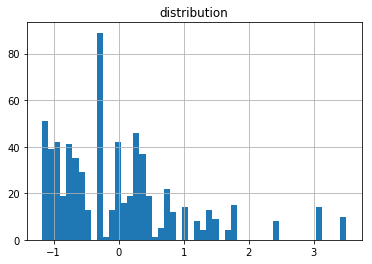

,crime_C_average,travel_min_to_CBD,Age,Rooms,crimescaled,travelscaled,roomscaled,agescaled
count,690.000000,690.000000,690.000000,690.000000,6.900000e+02,6.900000e+02,6.900000e+02,6.900000e+02
mean,142.401932,26.503261,54.036232,2.975362,1.602859e-17,-1.255035e-17,8.624341e-17,3.866673e-17
std,120.241006,11.023855,35.112138,0.962717,1.000725e+00,1.000725e+00,1.000725e+00,1.000725e+00
min,1.000000,0.000000,2.000000,1.000000,-1.176841e+00,-2.405918e+00,-1.483076e+00,-2.053351e+00
25%,51.333333,18.330000,24.000000,2.000000,-7.579333e-01,-7.419537e-01,-8.560578e-01,-1.013870e+00
50%,112.777778,26.380000,49.000000,3.000000,-2.465519e-01,-1.118940e-02,-1.435368e-01,2.561040e-02
75%,187.055556,32.000000,70.500000,4.000000,3.716371e-01,4.989840e-01,4.692312e-01,1.065091e+00
max,562.972222,68.820000,169.000000,8.000000,3.500265e+00,3.841436e+00,3.276564e+00,5.223015e+00


In [40]:
plt.figure()
plt.hist(x[:, 0], 50)
plt.grid()
plt.title('distribution')
plt.show()

name = pd.DataFrame([])
name['crime_C_average'] = features['crime_C_average']
name['travel_min_to_CBD'] = features['travel_min_to_CBD']
name['Age'] = features['Age']
name['Rooms'] = features['Rooms']
name['crimescaled'] = list(x[:, 0])
name['travelscaled'] = list(x[:, 1])
name['roomscaled'] = list(x[:, 2])
name['agescaled'] = list(x[:, 3])
name.describe()

In [41]:
print('Mean after standardisation:\nBedrooms = {:.2f}, Bathrooms = {:.2f}, Parking = {:.2f}'
      .format(features['Rooms'].mean(), features['Age'].mean(), features['travel_min_to_CBD'].mean()))
print('\nStandard deviation after standardisation:\nBedrooms = {:.2f}, Bathrooms = {:.2f}, Parking = {:.2f}'
      .format(x[:,1].std(), x[:,2].std(), x[:, 3].std()))

Mean after standardisation:
Bedrooms = 2.98, Bathrooms = 54.04, Parking = 26.50

Standard deviation after standardisation:
Bedrooms = 1.00, Bathrooms = 1.00, Parking = 1.00


In [ ]:
features["Rooms"].plot(), features["crime_C_average"].plot(), features["travel_min_to_CBD"].plot(), features["Age"].plot()

(<matplotlib.axes._subplots.AxesSubplot at 0x90f1a10>,
 <matplotlib.axes._subplots.AxesSubplot at 0x90f1a10>)

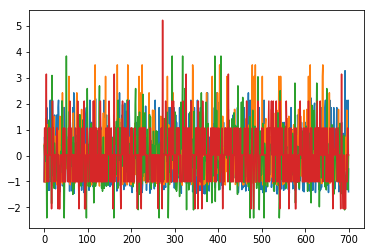

In [50]:
name["roomscaled"].plot(), name["crimescaled"].plot(), name["travelscaled"].plot(), name["agescaled"].plot()

#### Min Max normalization
We are implementing this with Scikit-Learn library and also manually

In [42]:
minmax_scale = MinMaxScaler().fit(features[['Rooms', 'Age', 'travel_min_to_CBD','crime_C_average']])
df_minmax = minmax_scale.transform(features[['Rooms', 'Age', 'travel_min_to_CBD','crime_C_average']])
df_minmax[0:5]

array([[0.14285714, 0.10179641, 0.44565533, 0.3450645 ],
       [0.42857143, 0.46107784, 0.39712293, 0.33967673],
       [0.42857143, 0.34730539, 0.34873583, 0.04211359],
       [0.42857143, 0.25149701, 0.52310375, 0.03064604],
       [0.28571429, 0.52095808, 0.51075269, 0.55696703]])

#### Log transformation

In [53]:
import math
name2 = pd.DataFrame([])
name2['Pricelpr'] = None

name2['crime_C_averagelpr'] = None
name2['Agelpr'] = None
name2['Roomslpr'] = None
index=newDF.index
for i in index:
    name2.loc[i, 'Pricelpr'] = math.log(newDF.loc[i, 'Price'], 2)
    name2.loc[i, 'crime_C_averagelpr'] = math.log(newDF.loc[i, 'crime_C_average'], 2)
    name2.loc[i, 'Agelpr'] = math.log(newDF.loc[i, 'Age'], 2)
    name2.loc[i, 'Roomslpr'] = math.log(newDF.loc[i, 'Rooms'], 2)
    i += 1
name2.head()

KeyError: 25

In [44]:
X = MinMaxScaler().fit(features[['Rooms', 'Age', 'travel_min_to_CBD','crime_C_average']]).transform(features[['Rooms', 'Age', 'travel_min_to_CBD','crime_C_average']])
y = MinMaxScaler().fit(features[['Price']]).transform(features[['Price']])

Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size = 0.2, random_state = 0)
model = linear_model.LinearRegression().fit(Xtrain, ytrain)
yp = model.predict(Xtest)

In [45]:
mae = mean_absolute_error(ytest, yp)
print('mean absolute error = {}'.format(mae))
model.coef_

mean absolute error = 0.07843674992846221


array([[ 0.60621583,  0.08165028, -0.25071379,  0.11408283]])